# Unit 5 - Financial Planning

In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
from urllib.request import urlopen

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [7]:
# Fetch current BTC price

requests.get(btc_url)
response=requests.get(btc_url)

btc_data_json=response.json()

my_btc_price=btc_data_json["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price

requests.get(eth_url)
response_eth=requests.get(eth_url)
eth_data_json=response_eth.json()

my_eth_price=eth_data_json["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto

my_btc_value = my_btc * my_btc_price
my_eth_value = my_eth * my_eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")


The current value of your 1.2 BTC is $24736.80
The current value of your 5.3 ETH is $8253.37


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")

# Create the Alpaca API object
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [10]:
# Format current date as ISO format

start_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
portfolio_data_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
display(portfolio_data_df.head())

# Reorganize the DataFrame
# Separate ticker data

AGG = portfolio_data_df[portfolio_data_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = portfolio_data_df[portfolio_data_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames

portfolio_data_df = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
portfolio_data_df.head()

open      high       low   close   volume  \
timestamp                                                                
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87  6099551   
2020-05-04 04:00:00+00:00  116.89  117.0900  116.8700  116.97  3684081   
2020-05-05 04:00:00+00:00  116.96  116.9700  116.8100  116.88  4611519   
2020-05-06 04:00:00+00:00  116.44  116.7100  116.3000  116.41  6394949   
2020-05-07 04:00:00+00:00  116.61  116.7700  116.4200  116.77  3786651   

                           trade_count        vwap symbol  
timestamp                                                  
2020-05-01 04:00:00+00:00        24394  116.846121    AGG  
2020-05-04 04:00:00+00:00        15545  116.960599    AGG  
2020-05-05 04:00:00+00:00        15146  116.879640    AGG  
2020-05-06 04:00:00+00:00        20233  116.426742    AGG  
2020-05-07 04:00:00+00:00        15963  116.641826    AGG

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87  6099551   
2020-05-04 04:00:00+00:00  116.89  117.0900  116.8700  116.97  3684081   
2020-05-05 04:00:00+00:00  116.96  116.9700  116.8100  116.88  4611519   
2020-05-06 04:00:00+00:00  116.44  116.7100  116.3000  116.41  6394949   
2020-05-07 04:00:00+00:00  116.61  116.7700  116.4200  116.77  3786651   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2020-05-01 04:00:00+00:00       24394  116.846121  285.16  290.6572  281.5200   
2020-05-04 04:00:00+00:00       15545  116.960599  280.46  283.9000  279.1300   
2020-05-05 04:00:00+00:00       15146  116.879640  286.66  289.2500  283.7134   
2020-05-06 04:00:00+00:00       20233  116.426742  288.01  288.4600  283.7800   
2020-05-07 04:00:00+00:00       15963  116.641826  287.79  289.7800  287.1300   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2020-05-01 04:00:00+00:00  282.79  125180028      639987  284.092832  
2020-05-04 04:00:00+00:00  283.57   80882213      460681  281.765334  
2020-05-05 04:00:00+00:00  286.19   79569939      459764  287.400201  
2020-05-06 04:00:00+00:00  284.25   73632628      436219  286.096273  
2020-05-07 04:00:00+00:00  287.68   75250412      422688  287.989956

In [12]:
# Pick AGG and SPY close prices

portfolio_prices_df=portfolio_data_df.head(1)

agg_close_price=portfolio_prices_df["AGG"]["close"][0]
spy_close_price=portfolio_prices_df["SPY"]["close"][0]

# Print AGG and SPY close prices

print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.87
Current SPY closing price: $282.79


In [13]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $14139.50
The current value of your 200 AGG shares is $23374.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

# Create savings DataFrame

savings = {
    "amount": [crypto, shares]
}

keys=["crypto","shares"]

df_savings = pd.DataFrame(savings, index=keys)
# Display savings DataFrame
display(df_savings)

amount
crypto  32990.172
shares  37513.500

<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

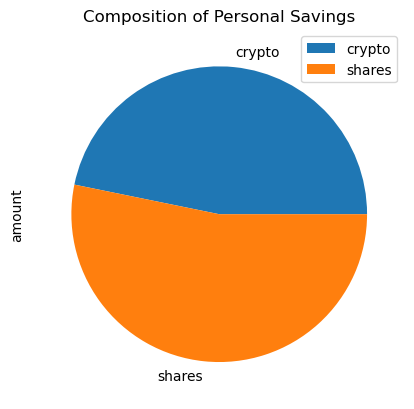

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [18]:
# Set ideal emergency fund

emergency_fund = monthly_income * 3

# Calculate total amount of savings

total_savings = crypto + shares

# Validate saving health

if total_savings > emergency_fund:
    print(f"Congratulations you have enough money in your emergency fund !\n")
elif total_savings := emergency_fund:
    print(f"Congratulations on reaching your financial goal.\n")
elif total_savings < emergency_fund:
    funds_short == total_savings - emergency_fund
    print(f"You are {funds_short} dollars away from reaching reaching your financial goal.\n")

Congratulations you have enough money in your emergency fund !



## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [23]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
startmc_date = pd.Timestamp('2017-05-10', tz='America/New_York').isoformat()
endmc_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [26]:
# Get 5 years' worth of historical data for SPY and AGG

tickers5 = ["AGG","SPY"]

# Set timeframe to "1Day"
timeframemc = "1Day"

df_stock_data = alpaca.get_bars(
    tickers5,
    timeframemc,
    start=startmc_date,
    end=endmc_date
).df

display(df_stock_data.head())

# Reorganize the DataFrame
# Separate ticker data
AGG5 = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY5 = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG5, SPY5],axis=1, keys=['AGG5','SPY5'])

# Display sample data
df_stock_data.head()

open     high       low    close   volume  \
timestamp                                                                
2017-05-10 04:00:00+00:00  108.60  108.660  108.4400  108.530  1653429   
2017-05-11 04:00:00+00:00  108.35  108.540  108.3435  108.520  2331142   
2017-05-12 04:00:00+00:00  108.81  108.940  108.7800  108.915  1329696   
2017-05-15 04:00:00+00:00  108.85  108.940  108.8200  108.880  1770999   
2017-05-16 04:00:00+00:00  108.88  109.101  108.8800  109.020  2051881   

                           trade_count        vwap symbol  
timestamp                                                  
2017-05-10 04:00:00+00:00         8667  108.524494    AGG  
2017-05-11 04:00:00+00:00         9679  108.486079    AGG  
2017-05-12 04:00:00+00:00         7028  108.877713    AGG  
2017-05-15 04:00:00+00:00        10064  108.894035    AGG  
2017-05-16 04:00:00+00:00         9435  108.966110    AGG

AGG5                                       \
                             open     high       low    close   volume   
timestamp                                                                
2017-05-10 04:00:00+00:00  108.60  108.660  108.4400  108.530  1653429   
2017-05-11 04:00:00+00:00  108.35  108.540  108.3435  108.520  2331142   
2017-05-12 04:00:00+00:00  108.81  108.940  108.7800  108.915  1329696   
2017-05-15 04:00:00+00:00  108.85  108.940  108.8200  108.880  1770999   
2017-05-16 04:00:00+00:00  108.88  109.101  108.8800  109.020  2051881   

                                                     SPY5                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2017-05-10 04:00:00+00:00        8667  108.524494  239.39  239.8700  239.15   
2017-05-11 04:00:00+00:00        9679  108.486079  239.35  239.5700  238.13   
2017-05-12 04:00:00+00:00        7028  108.877713  239.08  239.4273  238.67   
2017-05-15 04:00:00+00:00       10064  108.894035  239.47  240.4400  239.45   
2017-05-16 04:00:00+00:00        9435  108.966110  240.64  240.6700  239.63   

                                                                       
                              close    volume trade_count        vwap  
timestamp                                                              
2017-05-10 04:00:00+00:00  239.8600  54293799      152415  239.618396  
2017-05-11 04:00:00+00:00  239.4592  62269354      211029  239.088106  
2017-05-12 04:00:00+00:00  239.0500  53912730      158255  239.000514  
2017-05-15 04:00:00+00:00  240.2297  61868937      193291  240.042085  
2017-05-16 04:00:00+00:00  240.0900  51241791      183988  240.104677

In [28]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

num_sims = 500

mc30 = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    weights = [.40,.60],
    num_trading_days = 252*30
)

In [29]:
# Printing the simulation input data
mc30.portfolio_data.head()

AGG5                                       \
                             open     high       low    close   volume   
timestamp                                                                
2017-05-10 04:00:00+00:00  108.60  108.660  108.4400  108.530  1653429   
2017-05-11 04:00:00+00:00  108.35  108.540  108.3435  108.520  2331142   
2017-05-12 04:00:00+00:00  108.81  108.940  108.7800  108.915  1329696   
2017-05-15 04:00:00+00:00  108.85  108.940  108.8200  108.880  1770999   
2017-05-16 04:00:00+00:00  108.88  109.101  108.8800  109.020  2051881   

                                                                  SPY5  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-05-10 04:00:00+00:00        8667  108.524494          NaN  239.39   
2017-05-11 04:00:00+00:00        9679  108.486079    -0.000092  239.35   
2017-05-12 04:00:00+00:00        7028  108.877713     0.003640  239.08   
2017-05-15 04:00:00+00:00       10064  108.894035    -0.000321  239.47   
2017-05-16 04:00:00+00:00        9435  108.966110     0.001286  240.64   

                                                                             \
                               high     low     close    volume trade_count   
timestamp                                                                     
2017-05-10 04:00:00+00:00  239.8700  239.15  239.8600  54293799      152415   
2017-05-11 04:00:00+00:00  239.5700  238.13  239.4592  62269354      211029   
2017-05-12 04:00:00+00:00  239.4273  238.67  239.0500  53912730      158255   
2017-05-15 04:00:00+00:00  240.4400  239.45  240.2297  61868937      193291   
2017-05-16 04:00:00+00:00  240.6700  239.63  240.0900  51241791      183988   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-05-10 04:00:00+00:00  239.618396          NaN  
2017-05-11 04:00:00+00:00  239.088106    -0.001671  
2017-05-12 04:00:00+00:00  239.000514    -0.001709  
2017-05-15 04:00:00+00:00  240.042085     0.004935  
2017-05-16 04:00:00+00:00  240.104677    -0.000582

In [30]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
import warnings
warnings.filterwarnings('ignore')
mc30.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1         2          3          4          5    \
0      1.000000   1.000000  1.000000   1.000000   1.000000   1.000000   
1      0.997325   1.001883  1.007977   1.003376   0.997137   1.001348   
2      1.002104   0.998062  1.015626   1.000246   1.006430   1.004577   
3      0.984923   1.002153  1.020764   1.001227   1.012802   1.012165   
4      0.991479   1.002643  1.020357   0.999406   1.009831   1.011372   
...         ...        ...       ...        ...        ...        ...   
7556  14.432029  11.899368  5.858928  11.472031  28.029188  29.104202   
7557  14.399497  12.028608  5.895303  11.532497  28.018514  29.348455   
7558  14.542678  12.177574  5.843071  11.643396  28.393933  29.360961   
7559  14.500294  12.288525  5.836077  11.707955  28.301925  29.083370   
7560  14.434325  12.271363  5.857748  11.612231  28.481667  29.438788   

           6          7         8         9    ...       490       491  \
0     1.000000   1.000000  1.000000  1.000000  ...  1.000000  1.000000   
1     1.017172   1.002485  1.006286  1.012285  ...  0.997770  0.994152   
2     1.018641   1.004159  1.000935  1.019778  ...  1.001462  1.000948   
3     1.028877   1.008363  1.009141  1.021580  ...  1.005068  0.991840   
4     1.026342   1.009868  1.003016  1.025435  ...  1.010579  1.001380   
...        ...        ...       ...       ...  ...       ...       ...   
7556  8.443486  12.671155  8.041126  6.640022  ...  7.409204  6.415260   
7557  8.392659  12.575236  8.061556  6.608638  ...  7.307587  6.408222   
7558  8.382342  12.461042  7.917866  6.668484  ...  7.309659  6.477758   
7559  8.450990  12.414898  7.946265  6.622407  ...  7.291303  6.464345   
7560  8.467699  12.359079  7.940124  6.574248  ...  7.344551  6.411277   

            492       493       494        495       496        497  \
0      1.000000  1.000000  1.000000   1.000000  1.000000   1.000000   
1      1.005948  1.005376  0.991977   0.998341  0.984444   1.018102   
2      0.998053  1.009383  0.992201   0.989406  0.997435   1.012260   
3      1.003467  1.017694  0.989270   0.984368  1.011600   1.003819   
4      1.000095  1.021388  0.998029   0.981157  0.999946   1.017576   
...         ...       ...       ...        ...       ...        ...   
7556  15.729625  2.933635  8.190175  24.913702  4.845551  35.223074   
7557  15.770695  2.984388  8.154044  24.677707  4.868025  35.477925   
7558  15.727497  3.013604  8.119035  24.773250  4.875607  35.557401   
7559  15.745023  2.951205  8.055643  24.343399  4.877196  35.437289   
7560  15.746279  2.964412  8.045160  24.429601  4.845698  35.618538   

            498        499  
0      1.000000   1.000000  
1      1.005429   1.006953  
2      1.007330   1.012835  
3      1.006235   1.020139  
4      0.990449   1.015890  
...         ...        ...  
7556  38.517179  15.408773  
7557  38.263477  15.513205  
7558  38.301843  15.639421  
7559  38.437326  15.590425  
7560  38.209090  15.596951  

[7561 rows x 500 columns]

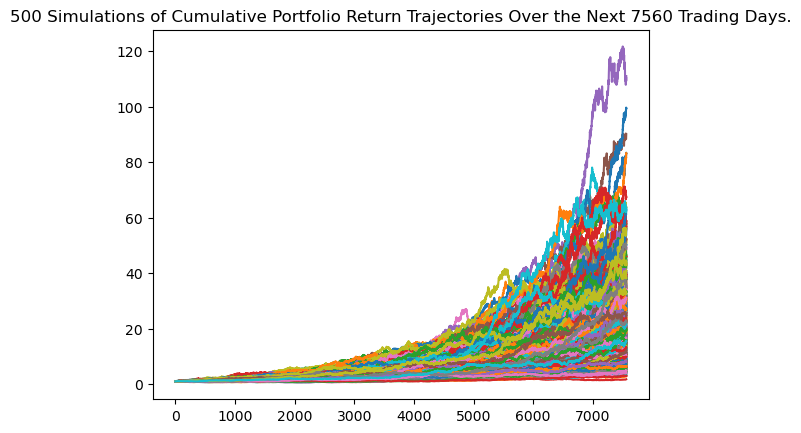

In [31]:
# Plot simulation outcomes
plot_simulation = mc30.plot_simulation()

plot_simulation.get_figure().savefig("mc_30years_sim_plot.png")

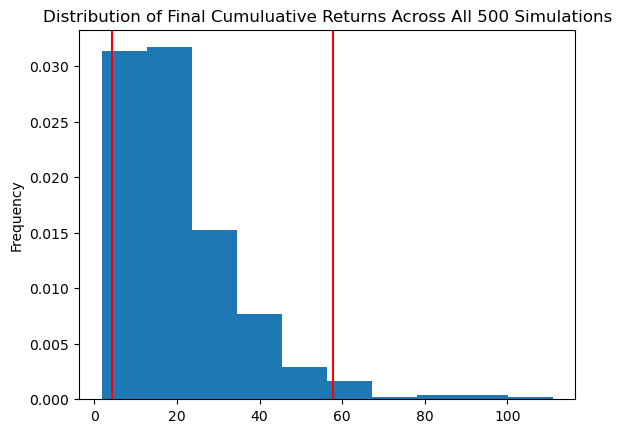

In [32]:
# Plot probability distribution and confidence intervals
dist_plot = mc30.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('mc_30year_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
mc30_summary_stats = mc30.summarize_cumulative_return()

# Print summary statistics
print(mc30_summary_stats)

count           500.000000
mean             20.879213
std              14.756658
min               1.755538
25%              10.759132
50%              17.092211
75%              27.412090
max             110.961396
95% CI Lower      4.277658
95% CI Upper     57.789877
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [34]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(mc30_summary_stats[8]*20000,2)
ci_upper = round(mc30_summary_stats[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $85553.15 and $1155797.54


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [35]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(mc30_summary_stats[8]*30000,2)
ci_upper = round(mc30_summary_stats[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $128329.73 and $1733696.31


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [37]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims5 = 500

mc5 = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims5,
    num_trading_days = 252*5
)

In [38]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
#import warnings
#warnings.filterwarnings('ignore')
mc5.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.992596  1.004743  0.995818  1.008139  1.007414  0.996656  0.993091   
2     0.992642  0.991248  0.994759  1.003052  0.995322  0.987321  0.985827   
3     0.997307  1.000119  0.991319  1.015579  1.003611  0.993856  0.987629   
4     0.995287  1.004135  0.993574  1.015910  1.002912  0.994612  0.986133   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.285528  2.619015  1.622560  1.038067  0.914225  1.466664  1.649270   
1257  1.264713  2.594556  1.624201  1.027106  0.907812  1.479519  1.652384   
1258  1.277049  2.591295  1.604243  1.023649  0.900091  1.476919  1.654148   
1259  1.280285  2.599246  1.616730  1.018052  0.901382  1.479845  1.642537   
1260  1.276173  2.604058  1.638981  1.023790  0.905777  1.486325  1.649803   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.994762  0.998282  0.997821  ...  0.993106  1.015123  0.992318   
2     0.998491  1.004622  0.991838  ...  0.998160  1.006371  0.990043   
3     1.004206  0.993163  0.996395  ...  0.993987  1.012954  0.990931   
4     1.001892  0.992664  1.002172  ...  0.979421  1.014952  0.995530   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.639330  1.155169  1.901211  ...  0.935776  1.986747  1.987266   
1257  1.628697  1.172274  1.888768  ...  0.926384  1.994965  1.960810   
1258  1.626953  1.168698  1.886182  ...  0.916852  1.988506  1.963481   
1259  1.641362  1.164147  1.881749  ...  0.918369  2.000045  1.963553   
1260  1.625006  1.165174  1.884250  ...  0.921169  2.003579  1.970409   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.998170  0.995017  0.989505  0.993679  1.001224  0.998533  1.013144  
2     1.009076  0.996900  0.988851  1.005469  1.010570  1.005603  1.011064  
3     1.005546  0.998952  0.985929  1.009111  1.009341  1.016840  1.013278  
4     1.000981  1.014026  1.001062  1.003685  1.008254  1.019334  1.003875  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.897384  1.837434  1.736072  1.845013  1.139145  1.421153  2.005520  
1257  1.898303  1.849381  1.745765  1.842630  1.147543  1.433591  1.997054  
1258  1.897793  1.836393  1.744916  1.847101  1.159758  1.448029  2.013777  
1259  1.902678  1.835056  1.739447  1.837607  1.168077  1.442882  2.034077  
1260  1.916644  1.838499  1.739248  1.844998  1.180244  1.443419  2.040980  

[1261 rows x 500 columns]

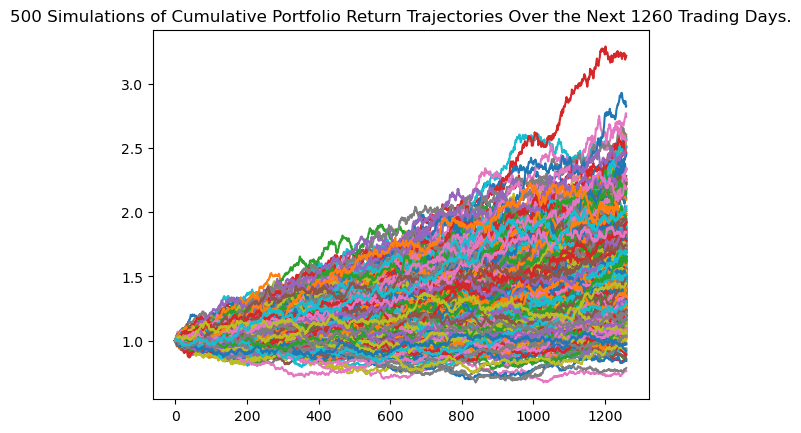

In [39]:
# Plot simulation outcomes
plot_simulation5 = mc5.plot_simulation()

plot_simulation5.get_figure().savefig("mc_5years_sim_plot.png")

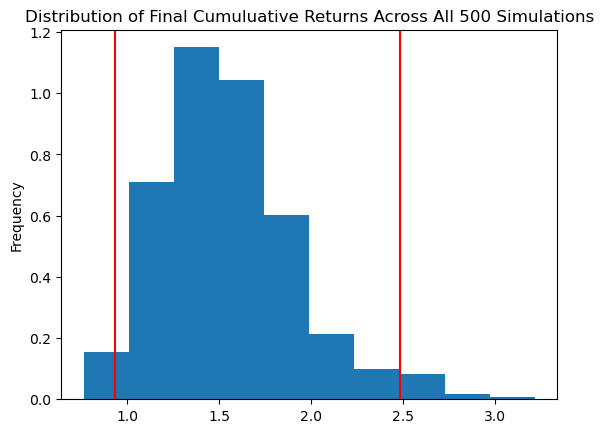

In [40]:
# Plot probability distribution and confidence intervals
dist5_plot = mc5.plot_distribution()

dist5_plot.get_figure().savefig('mc_5year_dist_plot.png',bbox_inches='tight')

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
mc5_summary_stats = mc5.summarize_cumulative_return()

# Print summary statistics
print(mc5_summary_stats)

count           500.000000
mean              1.548982
std               0.367312
min               0.764048
25%               1.286204
50%               1.503666
75%               1.741199
max               3.216529
95% CI Lower      0.934974
95% CI Upper      2.481819
Name: 1260, dtype: float64


In [42]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(mc5_summary_stats[8]*60000,2)
ci_upper_five = round(mc5_summary_stats[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56098.41 and $148909.14


### Ten Years Retirement Option

In [43]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims10 = 500

mc10 = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims10,
    weights = [.40,.60],
    num_trading_days = 252*10
)

In [44]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
#import warnings
#warnings.filterwarnings('ignore')
mc10.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.999039  1.009527  0.986655  0.997714  1.011915  0.993950  0.997989   
2     1.011796  1.015612  0.987614  0.991533  0.996489  0.989939  0.987308   
3     1.012678  1.017783  0.983691  0.990431  0.987650  0.997576  0.994160   
4     1.011143  1.003395  0.978356  0.988635  0.995963  1.001031  1.003704   
...        ...       ...       ...       ...       ...       ...       ...   
2516  2.836628  2.971635  4.364781  3.992474  2.174417  3.173467  1.859830   
2517  2.821679  2.963234  4.372991  4.048621  2.184808  3.213574  1.871308   
2518  2.849800  2.969214  4.332811  4.087363  2.200953  3.174112  1.863752   
2519  2.860017  2.977611  4.279524  4.078386  2.211804  3.155888  1.873912   
2520  2.848136  2.986091  4.309997  4.104513  2.228029  3.180130  1.864137   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.997260  0.992351  1.008574  ...  0.988661  1.003983  0.997576   
2     0.989654  0.993573  1.018869  ...  0.994667  1.007200  1.002891   
3     0.985517  0.987990  1.029182  ...  1.006450  1.005150  1.020867   
4     0.994174  0.978290  1.017397  ...  1.014416  0.998775  1.016871   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.819557  2.268912  2.627732  ...  3.434099  2.539020  2.555593   
2517  1.805214  2.286378  2.662257  ...  3.408348  2.572194  2.552701   
2518  1.807185  2.270027  2.683648  ...  3.446369  2.558046  2.566599   
2519  1.816583  2.277966  2.674744  ...  3.417421  2.576183  2.594977   
2520  1.830837  2.286388  2.697351  ...  3.419983  2.559952  2.622759   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.002309  1.003798  1.007510  0.996630  0.995169  0.998518  1.002329  
2     0.996389  1.009751  1.000657  0.996219  0.989821  1.002451  1.000685  
3     1.004319  1.011874  1.012771  0.995835  0.980891  1.003053  0.992565  
4     1.003522  1.020067  1.016624  0.988329  0.988677  0.999648  0.999486  
...        ...       ...       ...       ...       ...       ...       ...  
2516  3.474050  2.375677  3.848306  2.539555  2.907438  1.790957  2.077975  
2517  3.441731  2.363464  3.857166  2.534028  2.896580  1.798952  2.081707  
2518  3.479147  2.319017  3.826384  2.543695  2.902962  1.807970  2.060954  
2519  3.484777  2.319914  3.870730  2.550928  2.913998  1.803486  2.050372  
2520  3.478601  2.317469  3.866239  2.551011  2.917501  1.801832  2.027173  

[2521 rows x 500 columns]

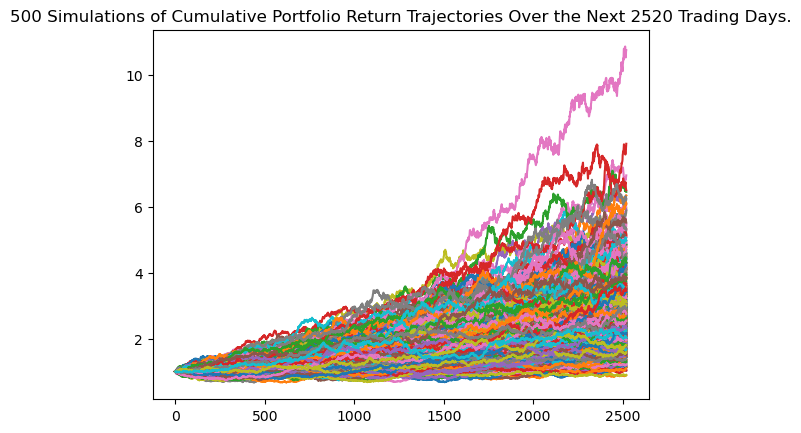

In [46]:
# Plot simulation outcomes
plot_simulation10 = mc10.plot_simulation()

plot_simulation10.get_figure().savefig("mc_10years_sim_plot.png")

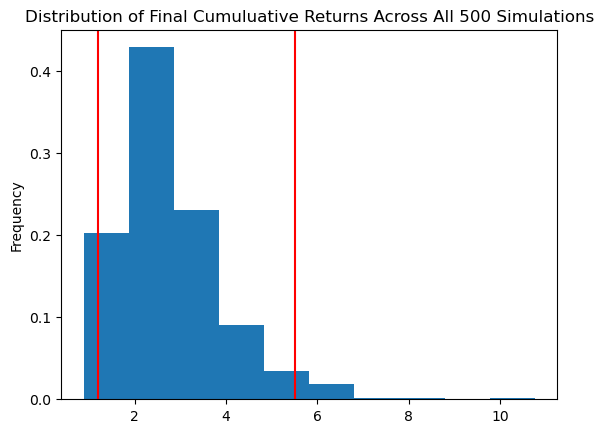

In [47]:
# Plot probability distribution and confidence intervals
dist10_plot = mc10.plot_distribution()

dist10_plot.get_figure().savefig('mc_10year_dist_plot.png',bbox_inches='tight')

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
mc10_summary_stats = mc10.summarize_cumulative_return()

# Print summary statistics
print(mc10_summary_stats)

count           500.000000
mean              2.776994
std               1.148610
min               0.883190
25%               2.024240
50%               2.558920
75%               3.297900
max              10.762047
95% CI Lower      1.201279
95% CI Upper      5.502737
Name: 2520, dtype: float64


In [49]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(mc10_summary_stats[8]*60000,2)
ci_upper_ten = round(mc10_summary_stats[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $72076.76 and $330164.19
